# Geometric Tensor Learning
---

In [6]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from omegaconf import OmegaConf
import os

import project_path

from util.visualize import plot_real

## Examine Results
Let's see how our algorithm performed. Starting with normalized error from the original signal.

In [2]:
files_out = os.listdir('../experiments/real_awgn')

In [36]:

awgn_dict = {}
gross_dict = {}
params = OmegaConf.load('../configs/real_conf.yaml')
for file in files_out:
    md = loadmat('../experiments/real_awgn/'+file)
    noise_type = params.noise.noise_type
    for key, value in md.items():
        if key in ['__header__', '__version__', '__globals__',
                            'params']:
            continue

        if noise_type == 'AWGN':
            if key in awgn_dict:
                if value.shape != awgn_dict[key].shape:
                    awgn_dict[key] = np.concatenate((awgn_dict[key],[value]), axis=0)
                else:
                    awgn_dict[key] = np.stack((awgn_dict[key],value))
            else:
                awgn_dict[key] = value

        elif noise_type == 'gross':
            if key in gross_dict:
                if value.shape != gross_dict[key].shape:
                    gross_dict[key] = np.concatenate((gross_dict[key],[value]), axis=0)
                else:
                    gross_dict[key] = np.stack((gross_dict[key],value))
            else:
                gross_dict[key] = value

In [37]:
def comp_err_std(arr):
    err_orig = np.mean(arr,axis=0)
    std_orig = np.std(arr,axis=0)
    return err_orig, std_orig

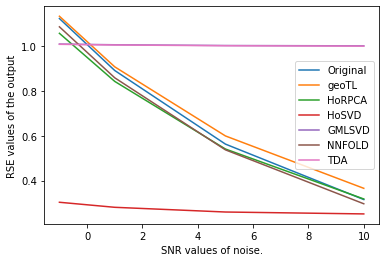

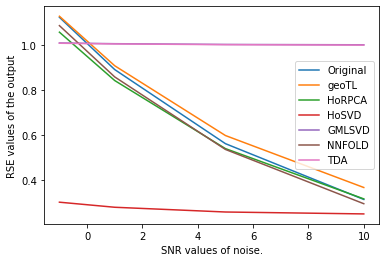

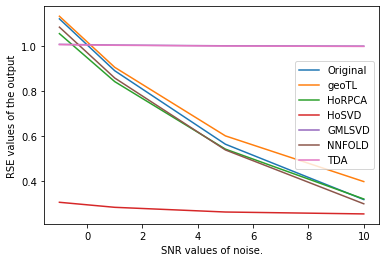

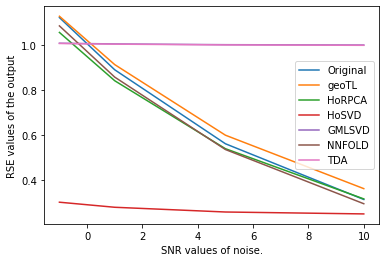

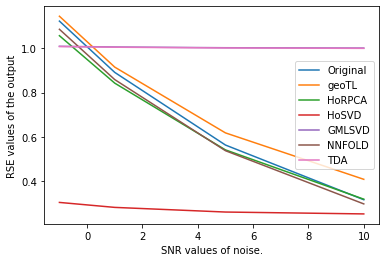

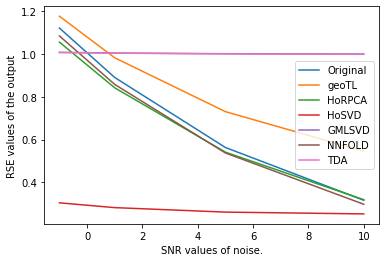

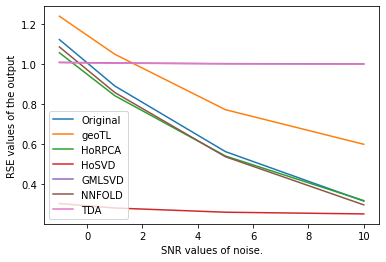

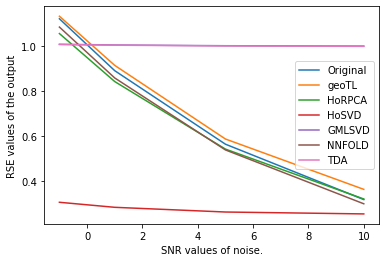

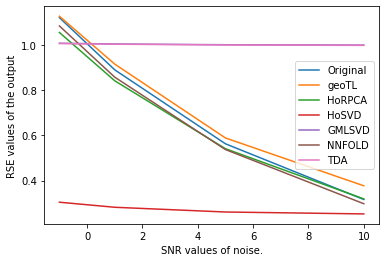

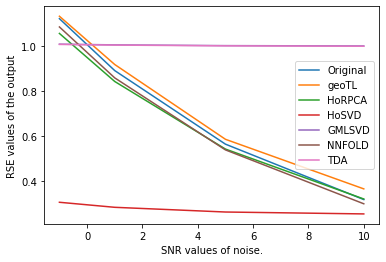

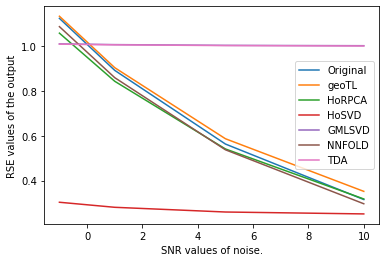

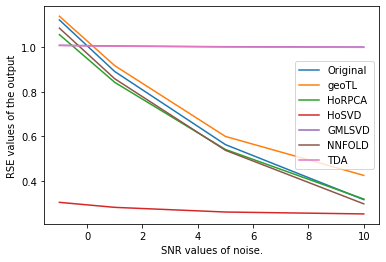

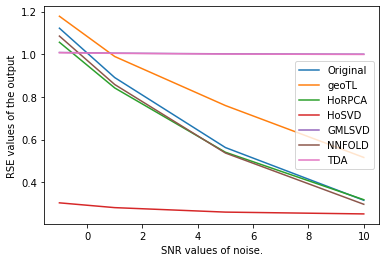

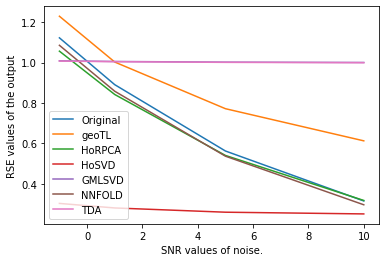

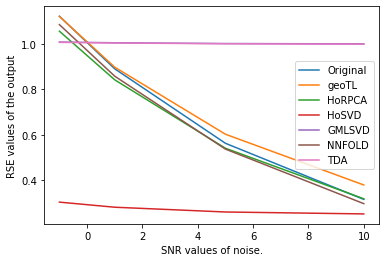

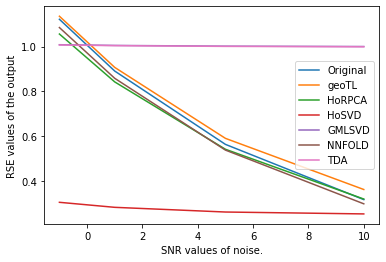

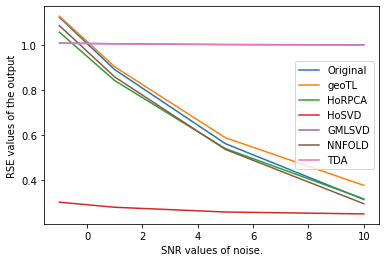

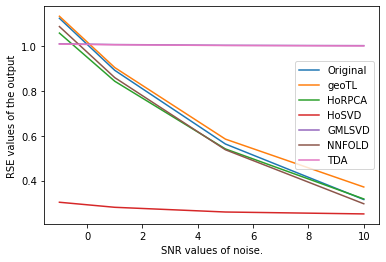

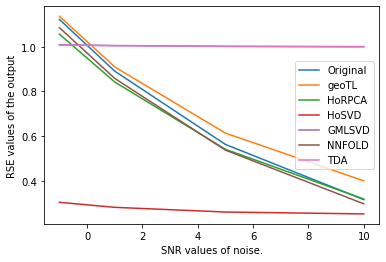

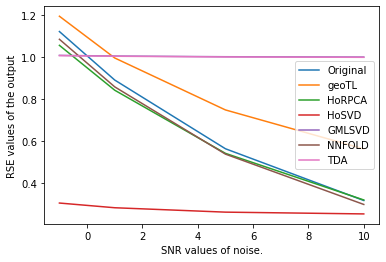

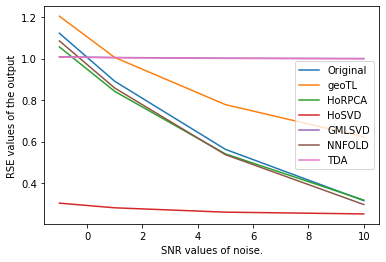

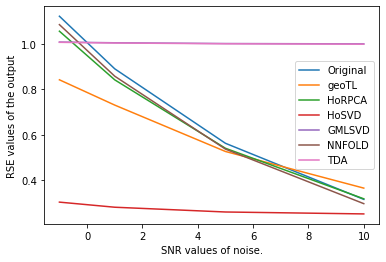

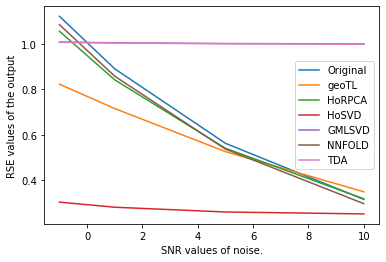

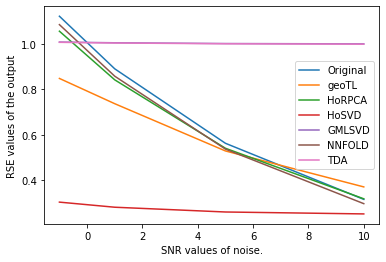

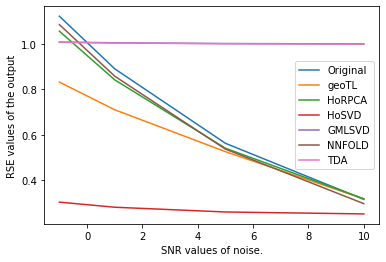

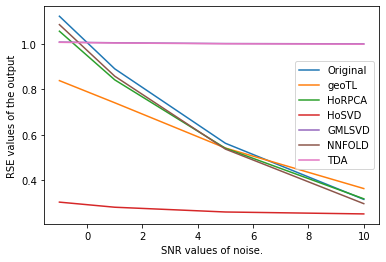

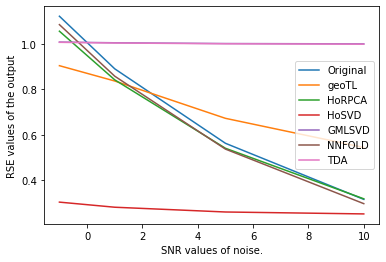

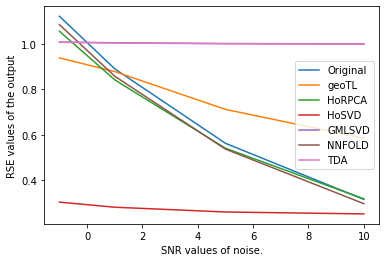

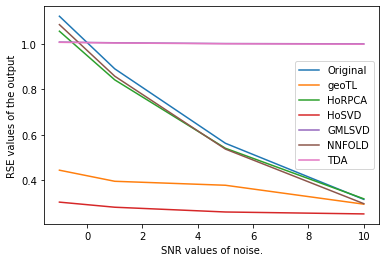

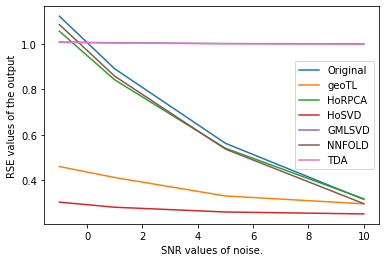

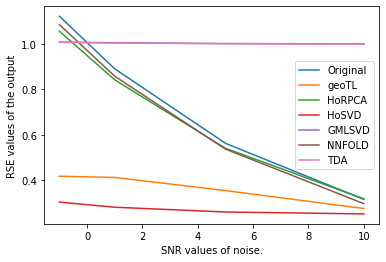

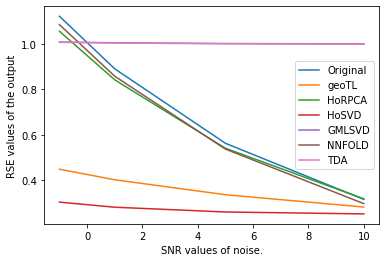

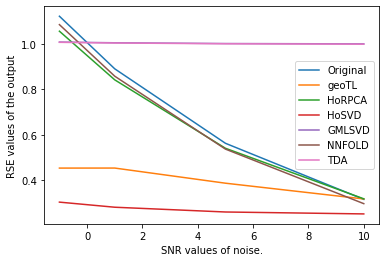

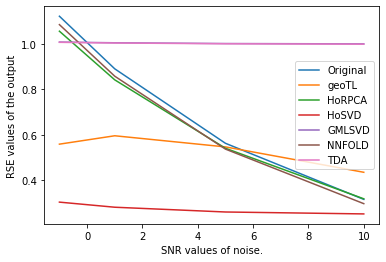

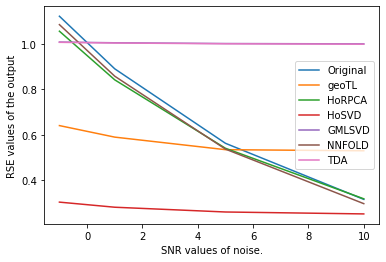

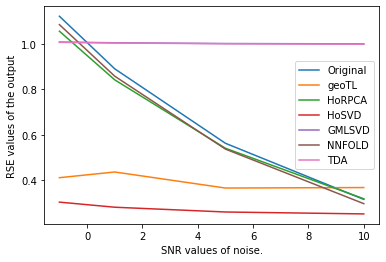

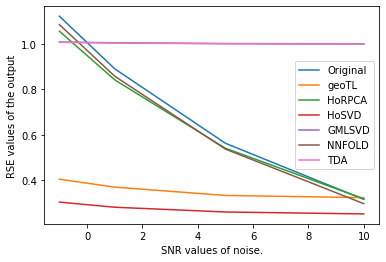

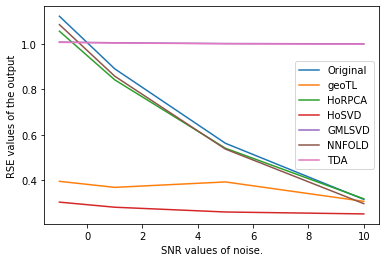

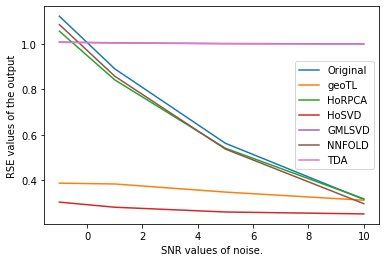

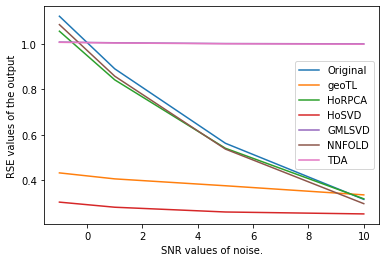

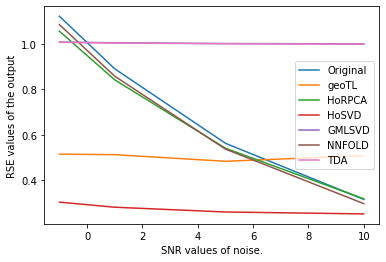

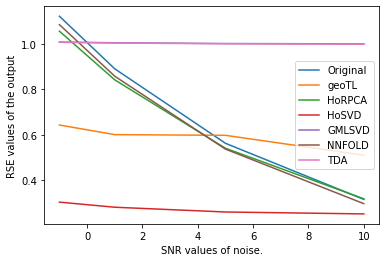

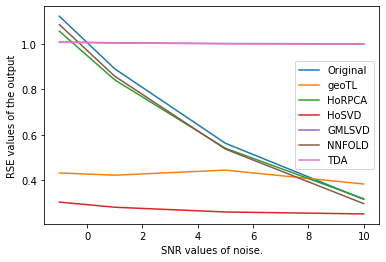

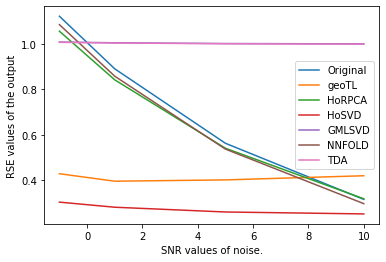

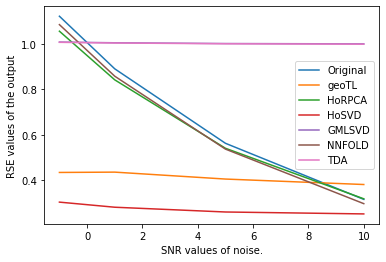

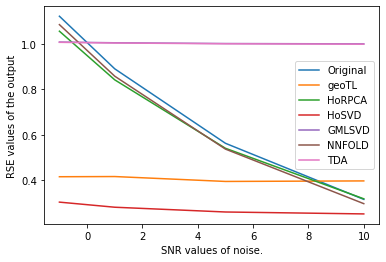

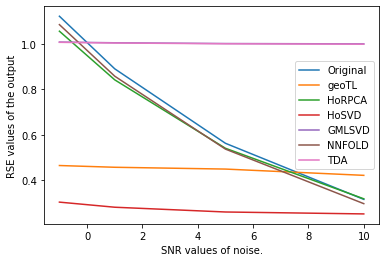

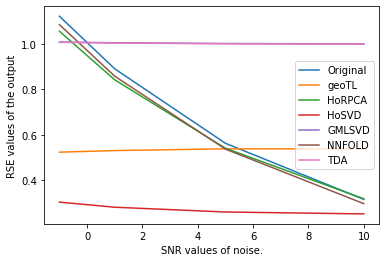

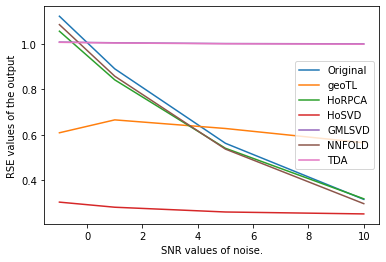

<Figure size 432x288 with 0 Axes>

In [38]:

mean_awgn_dict = {
    key: comp_err_std(awgn_dict[key])[0]
    for key in md.keys()
    if key not in ['__header__', '__version__', '__globals__', 'params']
}
std_awgn_dict = {
    key: comp_err_std(awgn_dict[key])[1]
    for key in md.keys()
    if key not in ['__header__', '__version__', '__globals__', 'params']
}
plot_real(params, mean_awgn_dict)

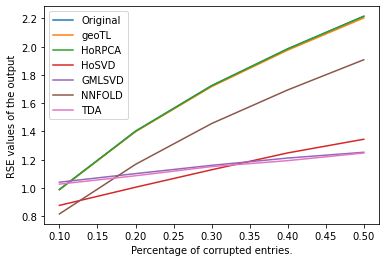

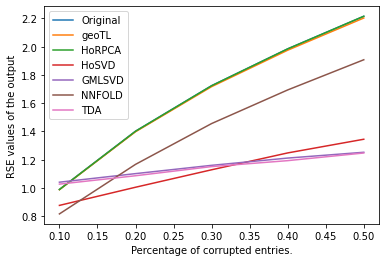

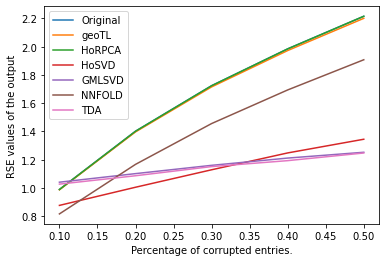

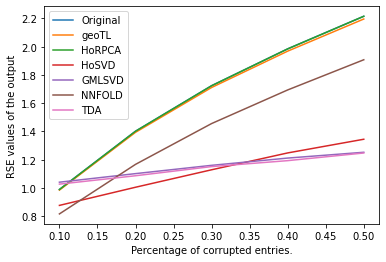

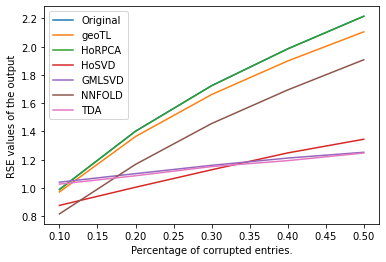

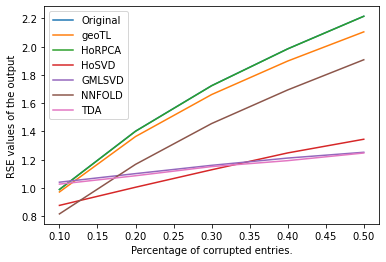

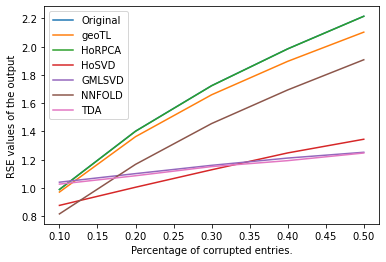

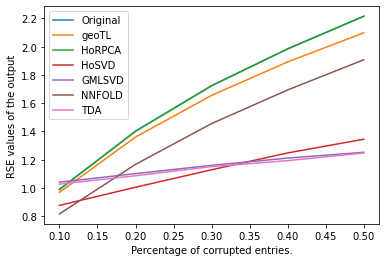

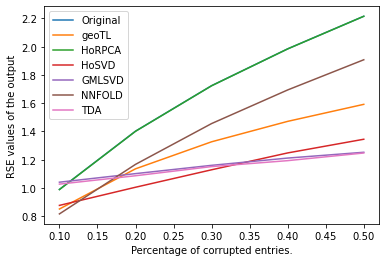

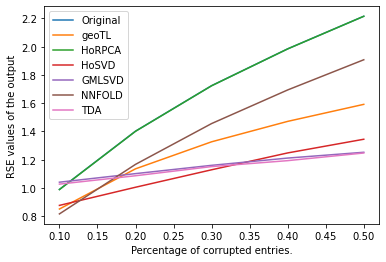

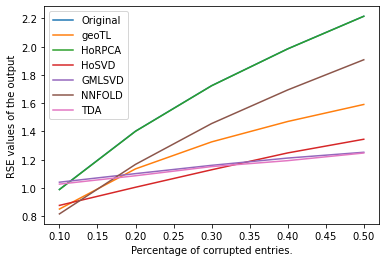

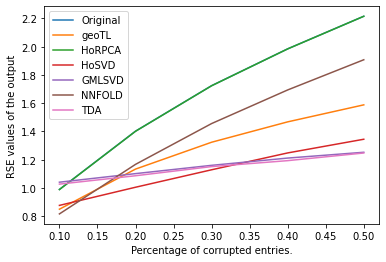

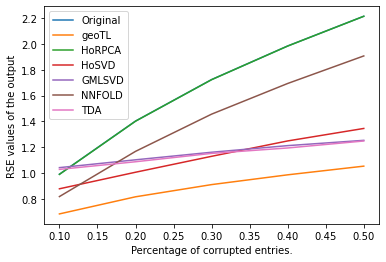

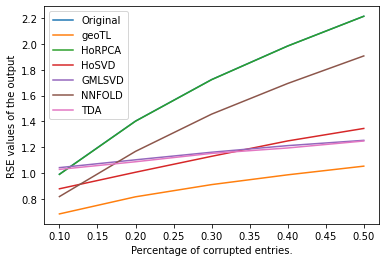

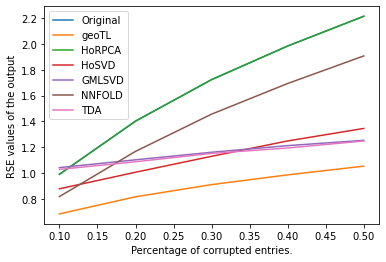

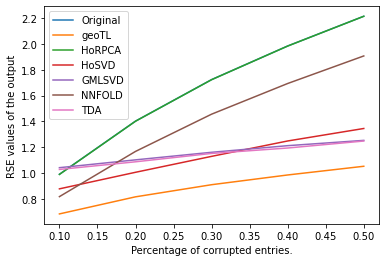

<Figure size 432x288 with 0 Axes>

In [7]:
params = OmegaConf.load('../configs/synthetic_gross_config.yaml')
mean_gross_dict = {
    key: comp_err_std(gross_dict[key])[0]
    for key in md.keys()
    if key not in ['__header__', '__version__', '__globals__', 'params']
}
std_gross_dict = {
    key: comp_err_std(gross_dict[key])[1]
    for key in md.keys()
    if key not in ['__header__', '__version__', '__globals__', 'params']
}
plot_synthetic(params, mean_gross_dict)